In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

### Task 1

In [2]:
# Load the dataset
iris = pd.read_csv('iris.csv')

# Display basic information about the dataset
print(iris.info())
print(iris.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

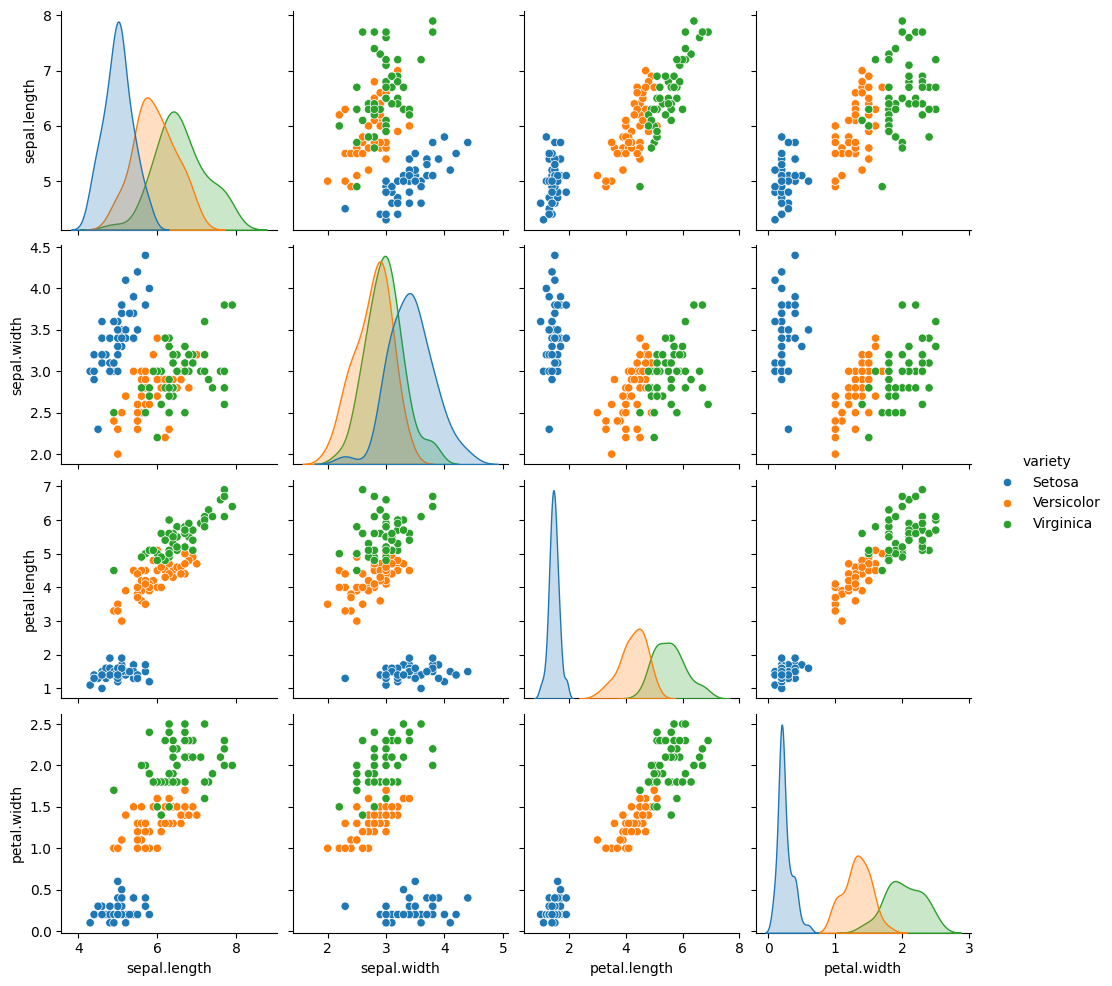

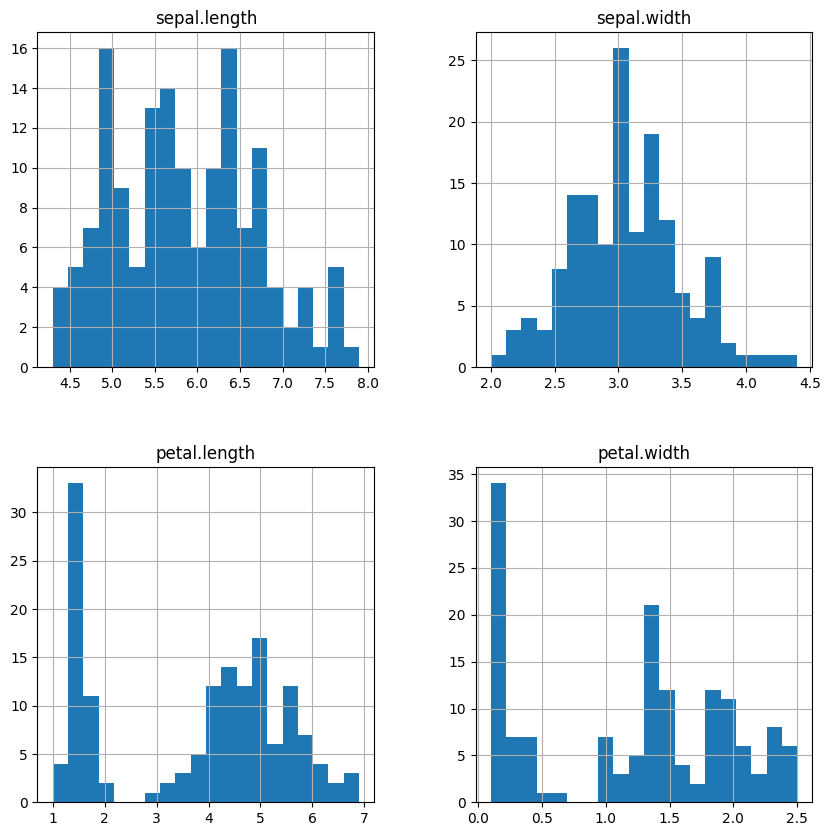

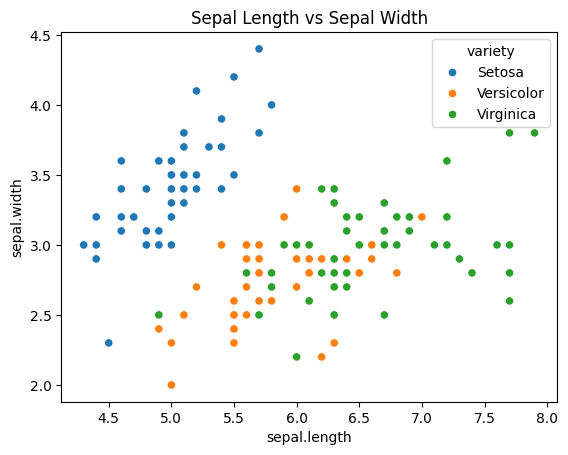

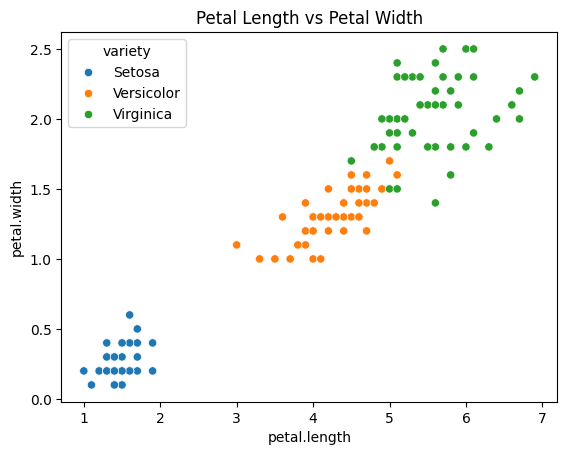

In [4]:
# Visualize data distributions
sns.pairplot(iris, hue='variety')
plt.show()

# Visualize data distributions using histograms
iris.hist(bins=20, figsize=(10, 10))
plt.show()

# Visualize data distributions using scatter plots
sns.scatterplot(x='sepal.length', y='sepal.width', hue='variety', data=iris)
plt.title('Sepal Length vs Sepal Width')
plt.show()

sns.scatterplot(x='petal.length', y='petal.width', hue='variety', data=iris)
plt.title('Petal Length vs Petal Width')
plt.show()

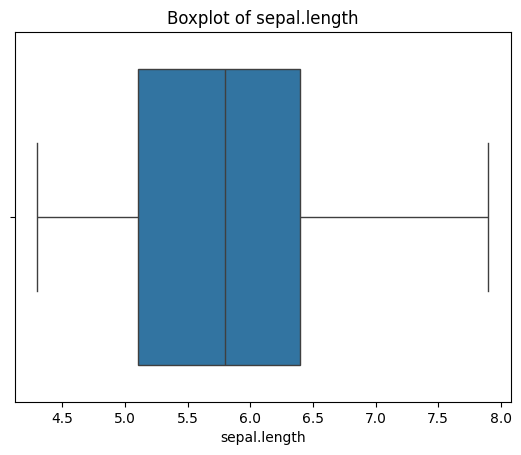

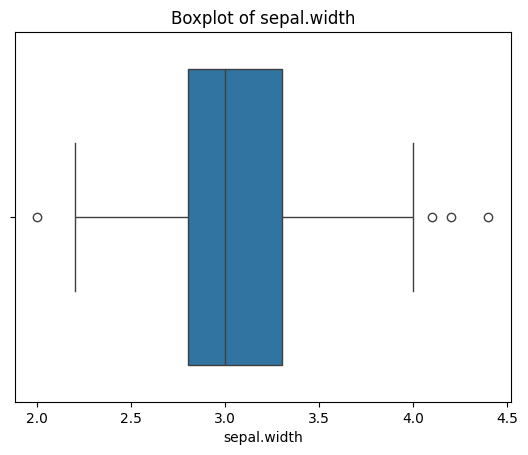

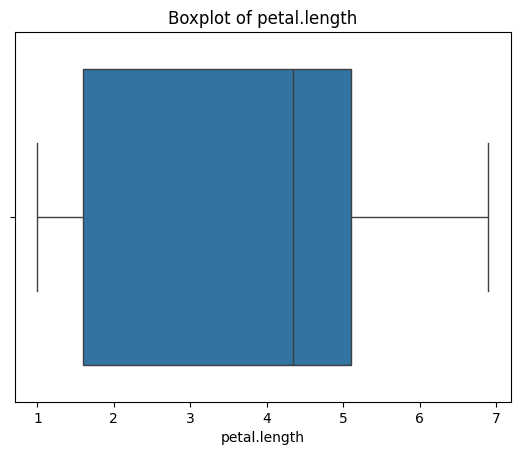

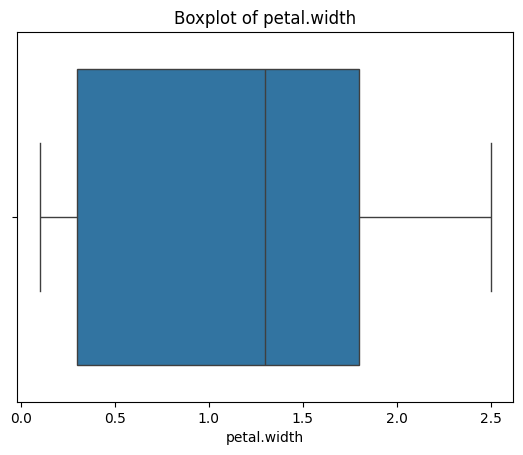

In [5]:
# Check for outliers using boxplots
for column in iris.select_dtypes(include=np.number).columns:
    sns.boxplot(x=iris[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

### Task 2

In [6]:
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

There is no missing value in this data set so no need to handle

### Task 3

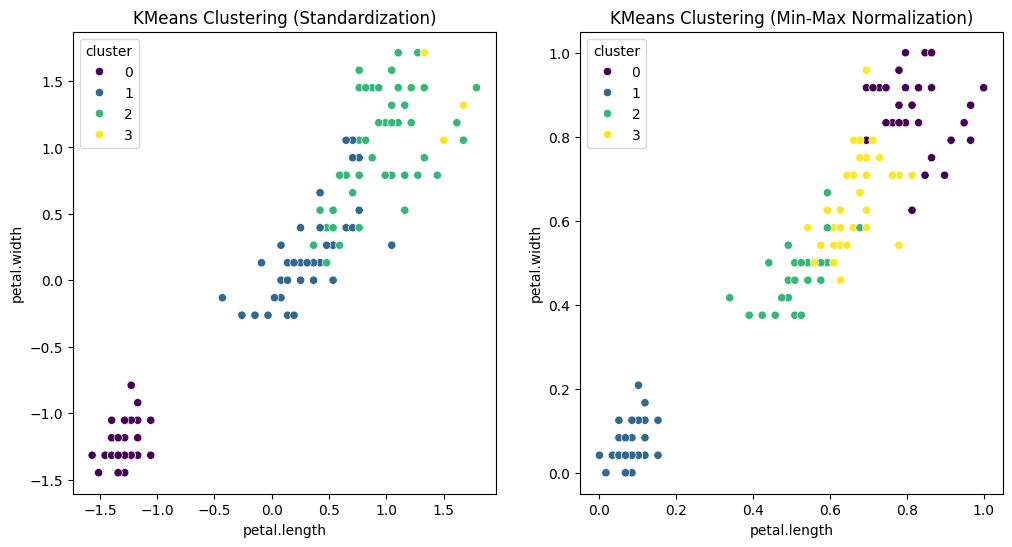

In [8]:
# Standardization (z-score)
scaler_standard = StandardScaler()
iris_standard = iris.copy()
iris_standard.iloc[:, :-1] = scaler_standard.fit_transform(iris_standard.iloc[:, :-1])

# Min-Max Normalization
scaler_minmax = MinMaxScaler()
iris_minmax = iris.copy()
iris_minmax.iloc[:, :-1] = scaler_minmax.fit_transform(iris_minmax.iloc[:, :-1])

# Apply KMeans clustering
kmeans_standard = KMeans(n_clusters=4)
iris_standard['cluster'] = kmeans_standard.fit_predict(iris_standard.iloc[:, :-1])

kmeans_minmax = KMeans(n_clusters=4)
iris_minmax['cluster'] = kmeans_minmax.fit_predict(iris_minmax.iloc[:, :-1])

# Plot clustering results for Standardization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='petal.length', y='petal.width', hue='cluster', data=iris_standard, palette='viridis')
plt.title('KMeans Clustering (Standardization)')

# Plot clustering results for Min-Max Normalization
plt.subplot(1, 2, 2)
sns.scatterplot(x='petal.length', y='petal.width', hue='cluster', data=iris_minmax, palette='viridis')
plt.title('KMeans Clustering (Min-Max Normalization)')

plt.show()

### Task 4

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'variety' column
iris['variety'] = label_encoder.fit_transform(iris['variety'])

# Display the first few rows to verify the encoding
print(iris.head())

   sepal.length  sepal.width  petal.length  petal.width  variety
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


### Task 5

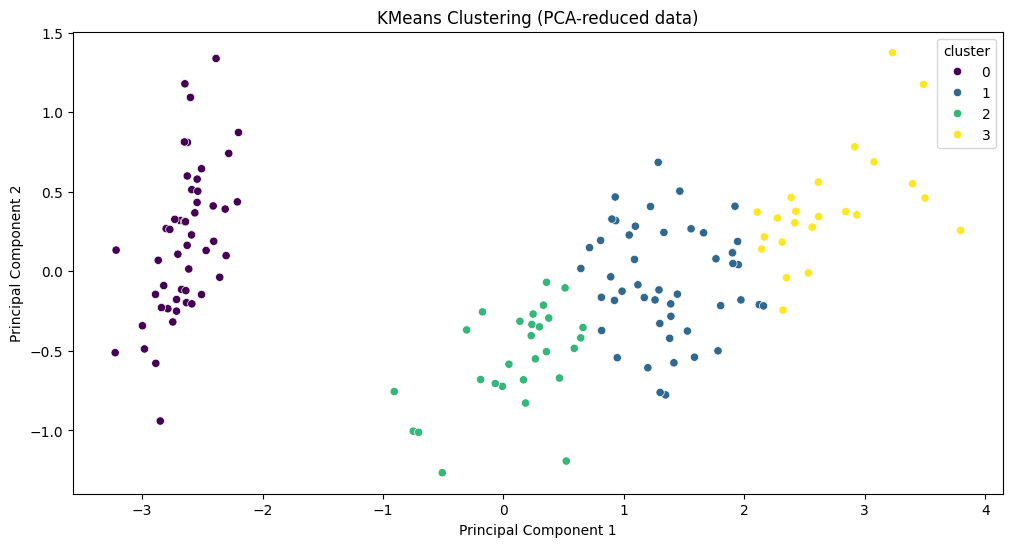

Silhouette Score (Original Data): 0.5034774406932966
Silhouette Score (PCA-reduced Data): 0.5591106064519759


In [ ]:
# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
iris_pca = iris.copy()
iris_pca_transformed = pca.fit_transform(iris_pca.iloc[:, :-1])
iris_pca = pd.DataFrame(iris_pca_transformed, columns=['PC1', 'PC2'])
iris_pca['variety'] = iris['variety']

# Apply KMeans clustering on the PCA-reduced data
kmeans_pca = KMeans(n_clusters=4)
iris_pca['cluster'] = kmeans_pca.fit_predict(iris_pca[['PC1', 'PC2']])

# Plot clustering results for PCA-reduced data
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=iris_pca, palette='viridis')
plt.title('KMeans Clustering (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Compare performance using silhouette score
silhouette_original = silhouette_score(iris.iloc[:, :-1], iris['variety'])
silhouette_pca = silhouette_score(iris_pca[['PC1', 'PC2']], iris_pca['cluster'])

print(f'Silhouette Score (Original Data): {silhouette_original}')
print(f'Silhouette Score (PCA-reduced Data): {silhouette_pca}')

### Task 6

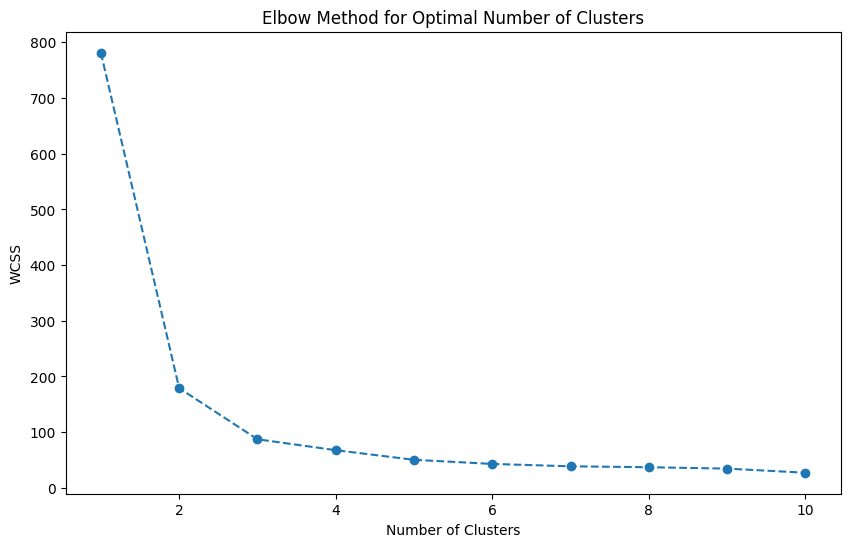

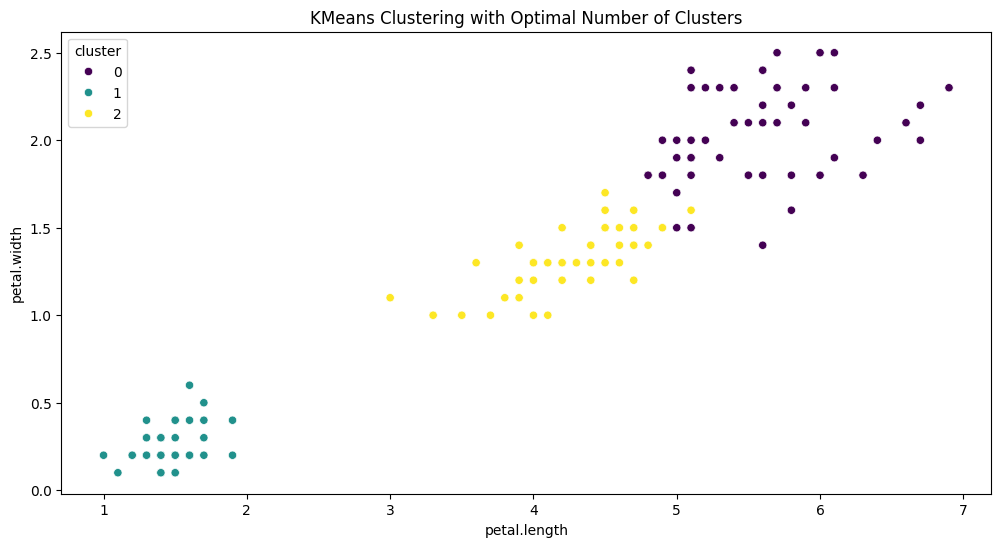

[[6.624 2.984 5.562 2.026 1.98 ]
 [5.006 3.428 1.462 0.246 0.   ]
 [5.9   2.76  4.25  1.326 1.02 ]]


In [17]:
# Apply K-means clustering with different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(iris.iloc[:, :-1])
    wcss.append(kmeans.inertia_)

# Plot the WCSS values to visualize the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# From the Elbow Method plot, choose the optimal number of clusters (e.g., 3)
optimal_clusters = 3
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
iris['cluster'] = kmeans_optimal.fit_predict(iris.iloc[:, :-1])

# Visualize the resulting clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='petal.length', y='petal.width', hue='cluster', data=iris, palette='viridis')
plt.title('KMeans Clustering with Optimal Number of Clusters')
plt.show()

# Analyze the cluster centroids
centroids = kmeans_optimal.cluster_centers_
print(centroids)

### Task 7

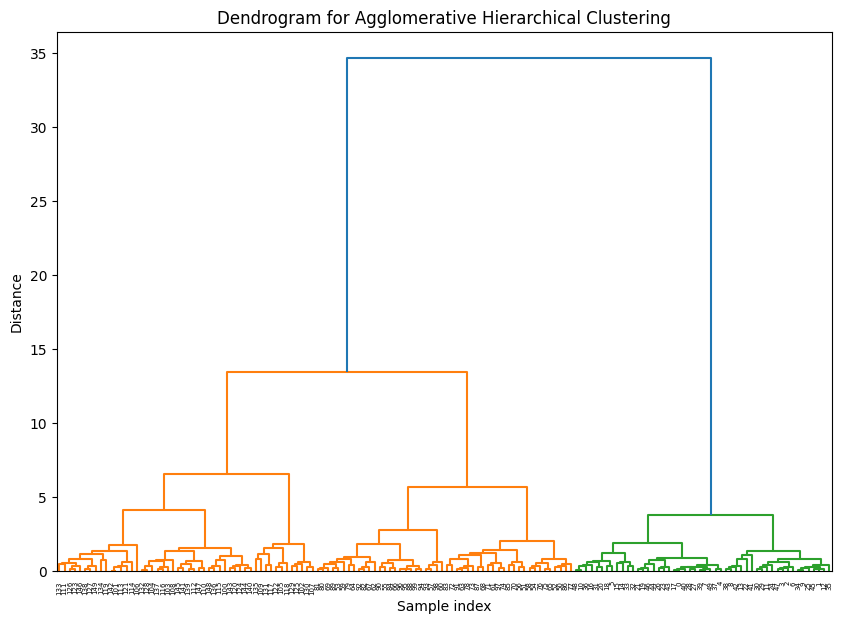

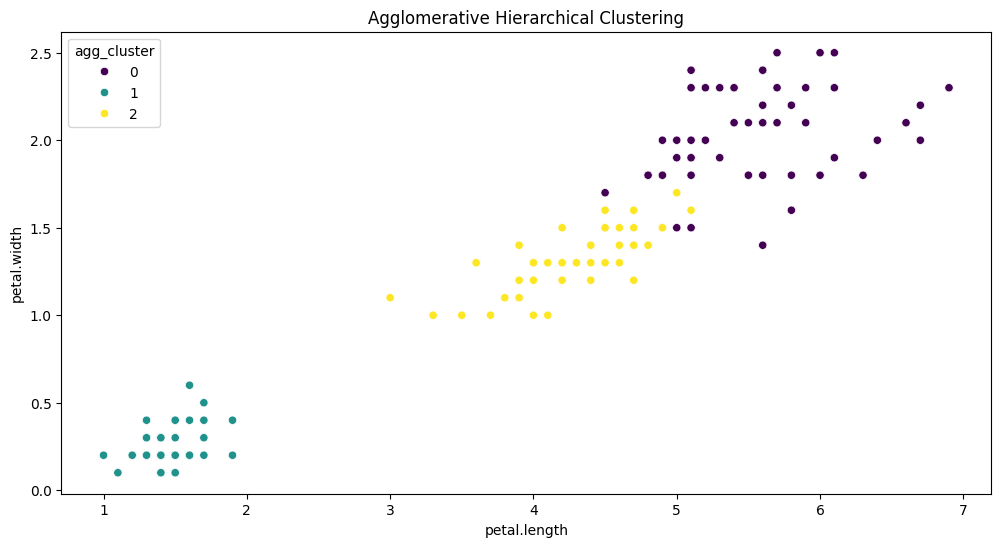

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical/agglomerative clustering
linked = linkage(iris.iloc[:, :-1], method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=iris.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Determine the appropriate number of clusters from the dendrogram and apply Agglomerative Clustering
n_clusters = 3  # You can change this based on the dendrogram
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
iris['agg_cluster'] = agg_clustering.fit_predict(iris.iloc[:, :-1])

# Visualize the resulting clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='petal.length', y='petal.width', hue='agg_cluster', data=iris, palette='viridis')
plt.title('Agglomerative Hierarchical Clustering')
plt.show()

### Task 8

In [19]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score

# Silhouette Score
silhouette_kmeans = silhouette_score(iris.iloc[:, :-2], iris['cluster'])
silhouette_agg = silhouette_score(iris.iloc[:, :-2], iris['agg_cluster'])

# Adjusted Rand Index (ARI)
ari_kmeans = adjusted_rand_score(iris['variety'], iris['cluster'])
ari_agg = adjusted_rand_score(iris['variety'], iris['agg_cluster'])

# Davies-Bouldin Index
dbi_kmeans = davies_bouldin_score(iris.iloc[:, :-2], iris['cluster'])
dbi_agg = davies_bouldin_score(iris.iloc[:, :-2], iris['agg_cluster'])

# Inertia (within-cluster sum of squares) for KMeans
inertia_kmeans = kmeans_optimal.inertia_

print(f'Silhouette Score (KMeans): {silhouette_kmeans}')
print(f'Silhouette Score (Agglomerative Clustering): {silhouette_agg}')
print(f'Adjusted Rand Index (KMeans): {ari_kmeans}')
print(f'Adjusted Rand Index (Agglomerative Clustering): {ari_agg}')
print(f'Davies-Bouldin Index (KMeans): {dbi_kmeans}')
print(f'Davies-Bouldin Index (Agglomerative Clustering): {dbi_agg}')
print(f'Inertia (KMeans): {inertia_kmeans}')

Silhouette Score (KMeans): 0.5791983481276921
Silhouette Score (Agglomerative Clustering): 0.5782157637460459
Adjusted Rand Index (KMeans): 0.9602666666666667
Adjusted Rand Index (Agglomerative Clustering): 1.0
Davies-Bouldin Index (KMeans): 0.6443138947249966
Davies-Bouldin Index (Agglomerative Clustering): 0.6522266467240291
Inertia (KMeans): 87.2646
